<a href="https://colab.research.google.com/github/MarynaTatsevich/AI/blob/master/Project_2_Develop_a_Model_to_Predict_Ice_Cream_Sales_Using_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example.

# STEP 0: Import libraries

In [0]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 419kB 47.2MB/s 
     |████████████████████████████████| 3.0MB 53.5MB/s 


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

# STEP 1: Import dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SalesData.csv')

In [0]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [0]:
df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [0]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# STEP 2: Visualize dataset

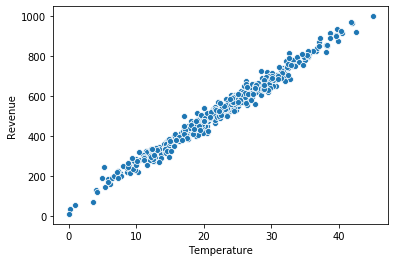

In [0]:
sns.scatterplot(df['Temperature'], df['Revenue'])

# STEP 3: Create testing and training dataset

In [0]:
X_train = df['Temperature']
y_train = df['Revenue']

# STEP 4: Build and train the model

In [0]:
X_train.shape

(500,)

In [0]:
y_train.shape

(500,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.5), loss = 'mean_squared_error')

In [0]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
500/500 [==============================] - 1s 3ms/sample - loss: 226784.3894
Epoch 2/100
500/500 [==============================] - 0s 72us/sample - loss: 88072.7349
Epoch 3/100
500/500 [==============================] - 0s 80us/sample - loss: 22524.4046
Epoch 4/100
500/500 [==============================] - 0s 83us/sample - loss: 3691.5252
Epoch 5/100
500/500 [==============================] - 0s 72us/sample - loss: 766.2267
Epoch 6/100
500/500 [==============================] - 0s 71us/sample - loss: 715.5536
Epoch 7/100
500/500 [==============================] - 0s 74us/sample - loss: 705.1655
Epoch 8/100
500/500 [==============================] - 0s 80us/sample - loss: 679.0886
Epoch 9/100
500/500 [==============================] - 0s 80us/sample - loss: 677.3336
Epoch 10/100
500/500 [==============================] - 0s 88us/sample - loss: 676.9950
Epoch 11/100
500/500 [==============================] - 0s 82us/sample - loss: 676.3774
Epoch 12/100
500/500 [============

# STEP 5: Evaluate the model

In [0]:
epochs_hist.history.keys()

dict_keys(['loss'])

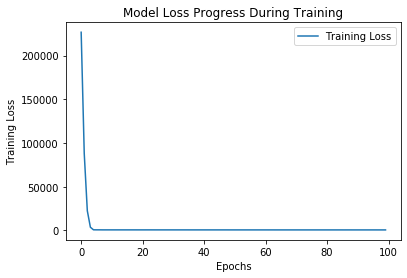

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [0]:
model.get_weights()

[array([[21.708271]], dtype=float32), array([39.540253], dtype=float32)]

In [0]:
# Use the trained model to perform predictions
n = 0
Temp1 = n
Rev1 = model.predict([Temp1])
print('Revenue Predictions Using Trained ANN when Temperature =',n, Rev1)

Revenue Predictions Using Trained ANN when Temperature = 0 [[39.540253]]


Text(0, 0.5, 'Revenue [dollars]')

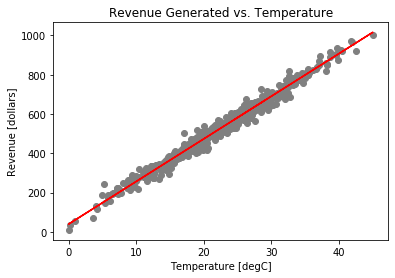

In [0]:
plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')

# STEP 6: Confirm using regression kit in scikit learn

In [0]:
X_train = X_train.values.reshape(-1,1)

In [0]:
X_train.shape

(500, 1)

In [0]:
y_train = y_train.values.reshape(-1,1)

In [0]:
y_train.shape

(500, 1)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Linear Model Coefficient (m):', regressor.coef_)
print('Linear Model Coefficient (b):', regressor.intercept_)

Linear Model Coefficient (m): [[21.44362551]]
Linear Model Coefficient (b): [44.83126709]


Text(0, 0.5, 'Revenue [dollars]')

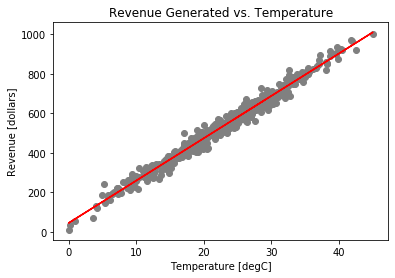

In [0]:
plt.scatter(X_train, y_train, color = 'grey')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature')
plt.xlabel('Temperature [degC]')
plt.ylabel('Revenue [dollars]')